# Imports 

In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt 

# Prepare Dataset 

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 32011481.01it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 964671.22it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 7655708.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2641870.58it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Model 

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

# Training 

In [4]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
train_losses = []
train_accuracies = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Calculate accuracy
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()  
        total += target.size(0)  
        
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100. * correct / total
    print(f'\nTraining set: Average loss: {avg_loss:.4f}, Accuracy: {correct}/{total} ({accuracy:.0f}%)\n')
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    
epochs = 10
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)

/opt/conda/lib/python3.10/site-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321425
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.285997
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.139521
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.271882
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.109088
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.132977
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.159449
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.062822
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.131877
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.174841

Training set: Average loss: 0.2006, Accuracy: 56329/60000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.065325
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.101837
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.033844
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.047224
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.052295
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.079607
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.066066
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.094885
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.110

# Plots 

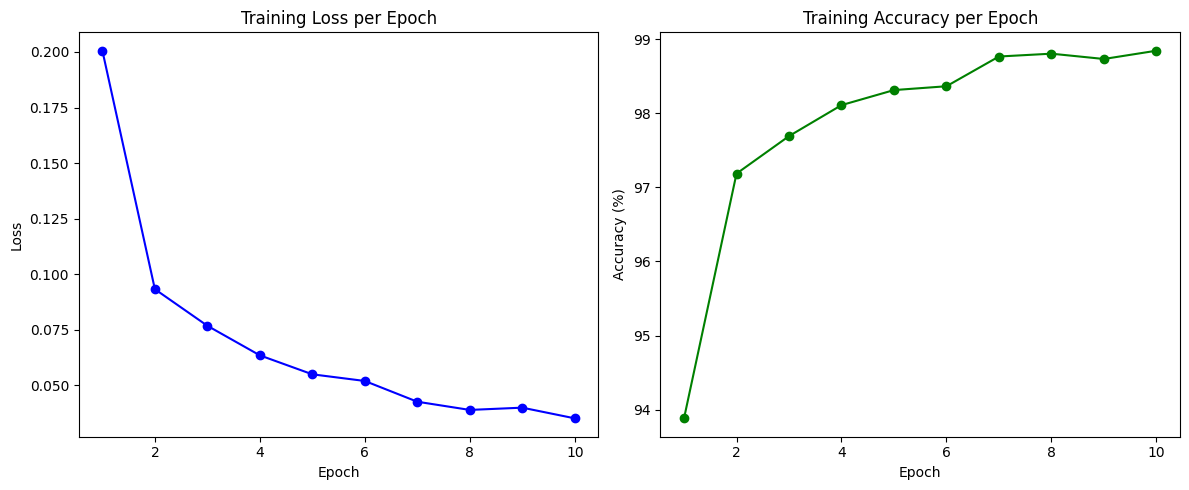

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', linestyle='-', color='g')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

# Evaluation

In [13]:
def test(model, device, test_loader):
    model.eval()  
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)  # Total number of samples

    test_loss /= total  # Average loss per sample
    accuracy = 100. * correct / total  # Accuracy percentage

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{total} ({accuracy:.0f}%)\n')

# Call the test function
test(model, device, test_loader)


Test set: Average loss: 0.0329, Accuracy: 9902/10000 (99%)



# Save the Model 

In [14]:
torch.save(model.state_dict(), "mnist_cnn.pt")